In [1]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Input

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
df=pd.read_csv("LP-IV-datasets/ECGdataset_Ass4/ecg_autoencoder_dataset.csv",header=None)


In [9]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,...,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,...,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,...,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,-0.674995,...,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,-0.983242,...,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.196807,-

In [10]:
x=df.drop([140],axis=1)
y=df[140]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=52)

In [13]:
input_dim=x_train.shape[1]
encoder=Sequential([
    Input(shape=(input_dim,)),
    Dense(8,activation='relu'),
    Dense(16,activation='relu')
])

decoder=Sequential([
    Input(shape=(16,)),
    Dense(8,activation='relu'),
    Dense(input_dim,activation='relu')
])

autoen=Sequential([
    encoder,
    decoder
])

In [14]:
autoen.compile(optimizer='adam',loss='mean_squared_error')
autoen.fit(x_train,x_train,epochs=50,batch_size=64, validation_data=(x_test,x_test))

Epoch 1/50
63/63 [==============================] - 1s 8ms/step - loss: 0.9468 - val_loss: 0.8695
Epoch 2/50
63/63 [==============================] - 0s 3ms/step - loss: 0.8302 - val_loss: 0.8125
Epoch 3/50
63/63 [==============================] - 0s 3ms/step - loss: 0.8029 - val_loss: 0.7920
Epoch 4/50
63/63 [==============================] - 0s 3ms/step - loss: 0.7840 - val_loss: 0.7791
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 0.7750 - val_loss: 0.7702
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 0.7664 - val_loss: 0.7619
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.7603 - val_loss: 0.7572
Epoch 8/50
63/63 [==============================] - 0s 4ms/step - loss: 0.7561 - val_loss: 0.7534
Epoch 9/50
63/63 [==============================] - 0s 4ms/step - loss: 0.7530 - val_loss: 0.7500
Epoch 10/50
63/63 [==============================] - 0s 3ms/step - loss: 0.7502 - val_loss: 0.7481
Epoch 11/50
63/63 [

In [16]:
y_pred=autoen.predict(x_test)

mse=np.mean(np.power(x_test-y_pred,2),axis=1)
threshold=np.percentile(mse,95)
outliers=mse>threshold



32/32 [==============================] - 0s 1ms/step


In [19]:
from sklearn.metrics import confusion_matrix,classification_report

print("confusion matrix: \n", confusion_matrix(y_test,outliers))


confusion matrix: 
 [[382  46]
 [568   4]]


In [20]:

num_anomalies=np.sum(y_test[outliers]==1)

print("outliers: ",np.sum(outliers))
print("anomalies: ", num_anomalies)

outliers:  50
anomalies:  4


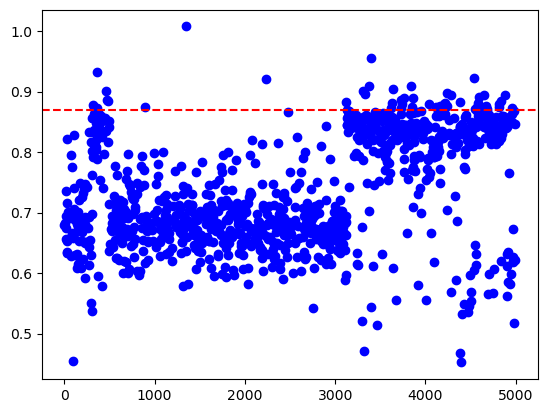

In [21]:
plt.plot(mse,marker='o',linestyle=' ',color='b')
plt.axhline(threshold,linestyle='--',color='r')